In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
import sys

sys.path.append('../')

In [3]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

In [4]:
PATH = '../data/bulldozers/'

In [5]:
!ls {PATH}

Data%20Dictionary.xlsx           TrainAndValid.csv
Machine_Appendix.csv             Valid.7z
Test.csv                         Valid.csv
Train.7z                         ValidSolution.csv
Train.csv                        median_benchmark.csv
TrainAndValid.7z                 random_forest_benchmark_test.csv


In [6]:
df_raw = pd.read_csv(f'{PATH}Train.csv', low_memory=False,
                     parse_dates=['saledate'])

In [7]:
def display_all(df):
    with pd.option_context('display.max_rows', 1000, 'display.max_columns', 1000):
        display(df)

In [8]:
display_all(df_raw.tail().T)

,401120,401121,401122,401123,401124
SalesID,6333336,6333337,6333338,6333341,6333342
SalePrice,10500,11000,11500,9000,7750
MachineID,1840702,1830472,1887659,1903570,1926965
ModelID,21439,21439,21439,21435,21435
datasource,149,149,149,149,149
auctioneerID,1,1,1,2,2
YearMade,2005,2005,2005,2005,2005
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,2011-11-02 00:00:00,2011-11-02 00:00:00,2011-11-02 00:00:00,2011-10-25 00:00:00,2011-10-25 00:00:00


In [9]:
display_all(df_raw.describe(include='all').T)

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
SalesID,401125,NaN,NaN,NaN,NaN,NaN,1.91971e+06,909021,1.13925e+06,1.41837e+06,1.63942e+06,2.24271e+06,6.33334e+06
SalePrice,401125,NaN,NaN,NaN,NaN,NaN,31099.7,23036.9,4750,14500,24000,40000,142000
MachineID,401125,NaN,NaN,NaN,NaN,NaN,1.2179e+06,440992,0,1.0887e+06,1.27949e+06,1.46807e+06,2.48633e+06
ModelID,401125,NaN,NaN,NaN,NaN,NaN,6889.7,6221.78,28,3259,4604,8724,37198
datasource,401125,NaN,NaN,NaN,NaN,NaN,134.666,8.96224,121,132,132,136,172
auctioneerID,380989,NaN,NaN,NaN,NaN,NaN,6.55604,16.9768,0,1,2,4,99
YearMade,401125,NaN,NaN,NaN,NaN,NaN,1899.16,291.797,1000,1985,1995,2000,2013
MachineHoursCurrentMeter,142765,NaN,NaN,NaN,NaN,NaN,3457.96,27590.3,0,0,0,3025,2.4833e+06
UsageBand,69639,3,Medium,33985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
saledate,401125,3919,2009-02-16 00:00:00,1932,1989-01-17 00:00:00,2011-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_raw.SalePrice = np.log(df_raw.SalePrice)

In [28]:
m = RandomForestRegressor(n_jobs=-1)

In [11]:
add_datepart(df_raw, 'saledate')

In [12]:
df_raw.saleYear.head()

0    2006
1    2004
2    2004
3    2011
4    2009
Name: saleYear, dtype: int64

In [13]:
df_raw.saleMonth.head()

0    11
1     3
2     2
3     5
4     7
Name: saleMonth, dtype: int64

In [14]:
train_cats(df_raw)

In [15]:
df_raw.UsageBand.cat.categories

Index(['High', 'Low', 'Medium'], dtype='object')

In [16]:
df_raw.UsageBand.cat.set_categories(['High', 'Medium', 'Low'],
                                    ordered=True,
                                    inplace=True)

In [17]:
df_raw.UsageBand = df_raw.UsageBand.cat.codes

In [18]:
display_all(df_raw.isnull().sum().sort_index()/len(df_raw))

Backhoe_Mounting            0.803872
Blade_Extension             0.937129
Blade_Type                  0.800977
Blade_Width                 0.937129
Coupler                     0.466620
Coupler_System              0.891660
Differential_Type           0.826959
Drive_System                0.739829
Enclosure                   0.000810
Enclosure_Type              0.937129
Engine_Horsepower           0.937129
Forks                       0.521154
Grouser_Tracks              0.891899
Grouser_Type                0.752813
Hydraulics                  0.200823
Hydraulics_Flow             0.891899
MachineHoursCurrentMeter    0.644089
MachineID                   0.000000
ModelID                     0.000000
Pad_Type                    0.802720
Pattern_Changer             0.752651
ProductGroup                0.000000
ProductGroupDesc            0.000000
ProductSize                 0.525460
Pushblock                   0.937129
Ride_Control                0.629527
Ripper                      0.740388
S

In [19]:
os.makedirs('tmp', exist_ok=True)
df_raw.to_feather('tmp/bulldozers-raw')

In [20]:
df_raw = pd.read_feather('tmp/bulldozers-raw')

In [21]:
df, y, nas = proc_df(df_raw, 'SalePrice')

In [22]:
??proc_df

Signature:
proc_df(
    df,
    y_fld=None,
    skip_flds=None,
    ignore_flds=None,
    do_scale=False,
    na_dict=None,
    preproc_fn=None,
    max_n_cat=None,
    subset=None,
    mapper=None,
)
Source:   
def proc_df(df, y_fld=None, skip_flds=None, ignore_flds=None, do_scale=False, na_dict=None,
            preproc_fn=None, max_n_cat=None, subset=None, mapper=None):
    """ proc_df takes a data frame df and splits off the response variable, and
    changes the df into an entirely numeric dataframe. For each column of df 
    which is not in skip_flds nor in ignore_flds, na values are replaced by the
    median value of the column.
    Parameters:
    -----------
    df: The data frame you wish to process.
    y_fld: The name of the response variable
    skip_flds: A list of fields that dropped from df.
    ignore_flds: A list of fields that are ignored during processing.
    do_scale: Standardizes each column in df. Takes Boolean Values(True,False)
    na_dict: a dictionary of n

In [23]:
m.fit(df, y)
m.score(df, y)

NameError: name 'm' is not defined

In [24]:
def split_vals(a, n):
    return a[:n].copy(), a[n:].copy()

n_valid = 12000
n_trn = len(df) - n_valid
raw_train, raw_valid = split_vals(df_raw, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((389125, 66), (389125,), (12000, 66), (12000,))

In [25]:
def rmse(x, y):
    return math.sqrt(((x - y) ** 2).mean())

In [26]:
def print_score(m):
    res = [rmse(m.predict(X_train), y_train), 
           rmse(m.predict(X_valid), y_valid),
           m.score(X_train, y_train),
           m.score(X_valid, y_valid),
          ]
    if hasattr(m, 'oob_score_'):
        res.append(m.oob_score_)
    print(res)

In [53]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

/Users/Wakawaka/anaconda/envs/fastai-cpu/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 1min 13s, sys: 601 ms, total: 1min 14s
Wall time: 15 s
[0.09046487704717358, 0.25129819481224913, 0.9828961129213941, 0.8872213967157517]


In [27]:
df_trn, y_trn, nas = proc_df(df_raw, 'SalePrice', subset=30000, na_dict=nas)
X_train, _ = split_vals(df_trn, 20000)
y_train, _ = split_vals(y_trn, 20000)

In [28]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

/Users/Wakawaka/anaconda/envs/fastai-cpu/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 3.1 s, sys: 46.1 ms, total: 3.14 s
Wall time: 716 ms
[0.1126592829792217, 0.3743249630140532, 0.9724564492537215, 0.7497664399190078]


In [29]:
m = RandomForestRegressor(n_estimators=1, max_depth=3,
                          bootstrap=False, n_jobs=-1)

In [30]:
m.fit(X_train, y_train)
print_score(m)

[0.5236968835599203, 0.5809202661900332, 0.4048232748801045, 0.39732797966495037]


In [31]:
m = RandomForestRegressor(n_estimators=1, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[5.329070518200751e-17, 0.5683513444924682, 1.0, 0.42312494817490653]


In [32]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

/Users/Wakawaka/anaconda/envs/fastai-cpu/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.11418878626030457, 0.3675723354801567, 0.9717034900249878, 0.7587131746115816]


In [33]:
??print_score

Signature: print_score(m)
Docstring: <no docstring>
Source:   
def print_score(m):
    res = [rmse(m.predict(X_train), y_train), 
           rmse(m.predict(X_valid), y_valid),
           m.score(X_train, y_train),
           m.score(X_valid, y_valid),
          ]
    if hasattr(m, 'oob_score_'):
        res.append(m.oob_score_)
    print(res)
File:      ~/Projects/fastai/courses/ml1/review/<ipython-input-26-d332db90879a>
Type:      function


In [35]:
m = RandomForestRegressor(n_estimators=1, max_depth=3,
                          bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.5236968835599203, 0.5809202661900373, 0.4048232748801045, 0.3973279796649419]


In [ ]:
draw_tree(m.estimators_[0], df_trn, precision=3)

In [38]:
m = RandomForestRegressor(n_estimators=1, bootstrap=False,
                          n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[5.329070518200751e-17, 0.5797187702503671, 1.0, 0.3998183701869425]


In [39]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

/Users/Wakawaka/anaconda/envs/fastai-cpu/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.11446094351779582, 0.3678203951317412, 0.971568445627102, 0.7583873953490191]


In [46]:
raw_preds = [t.predict(X_valid) for t in m.estimators_]
preds = np.stack(raw_preds)
preds[:,0], np.mean(preds[:,0]), y_valid[0]

(array([ 9.25913,  9.10498, 10.30895,  9.18502,  9.54681,  9.51044,  9.18502,  8.92266,  8.92266,  9.10498]),
 9.305066220948312,
 9.104979856318357)

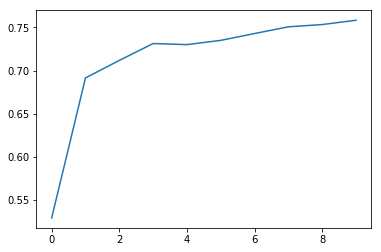

In [52]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(10)])